In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

<h2>Machine Learning Algorithms</h2>

1. K-Nearest Neighbors
2. Support Vector Classifier
3. Decision Tree

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset = pd.read_csv('heart.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


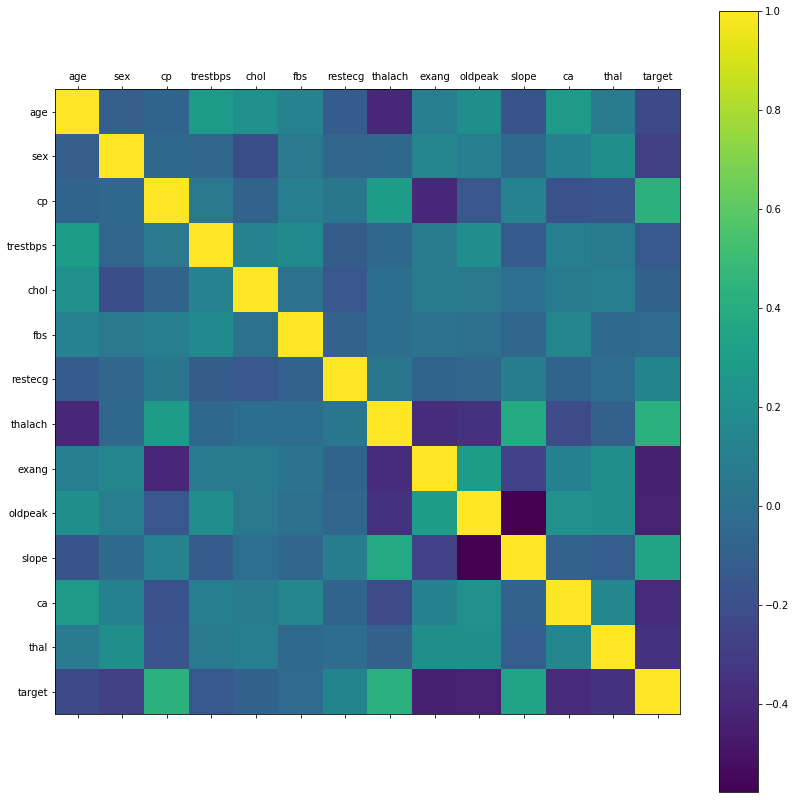

In [5]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

<h2>Classes Descriptions</h2>

1. age: Age in years
2. ca: Number of major blood vessels (0-3)
3. chol: Serum cholestrol in mg/dl
4. cp: Chest pain type
    * Value 1: Typical angina
    * Value 2: Atypical angina
    * Value 3: Non-anginal pain
    * Value 4: Asymptomatic
5. exang: Exercise induced angina (1 = yes; 0 = no)
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = no)
7. oldpeak: ST depression induced by exercise relative to rest
8. restecg: Resting electrocardiographic results
    * Value 0: Normal
    * Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
9. sex: Sex (1 = male; 0 = female)
10. slope: The slope of the peak exercise ST segment
    * Value 1: Upsloping
    * Value 2: Flat
    * Value 3: Downsloping
11. target: Target (0 = disease; 1 = no disease)
12. thal: Thalium stress test
    * Value 3: normal
    * Value 6: fixed defect
    * Value 7: reversibe defect
13. thalach: Maximum heart rate achieved in bpm
14. trestbps: Resting blood pressure (in mmHg on admission to the hospital)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202561B3CC0>,
      dtype=object)

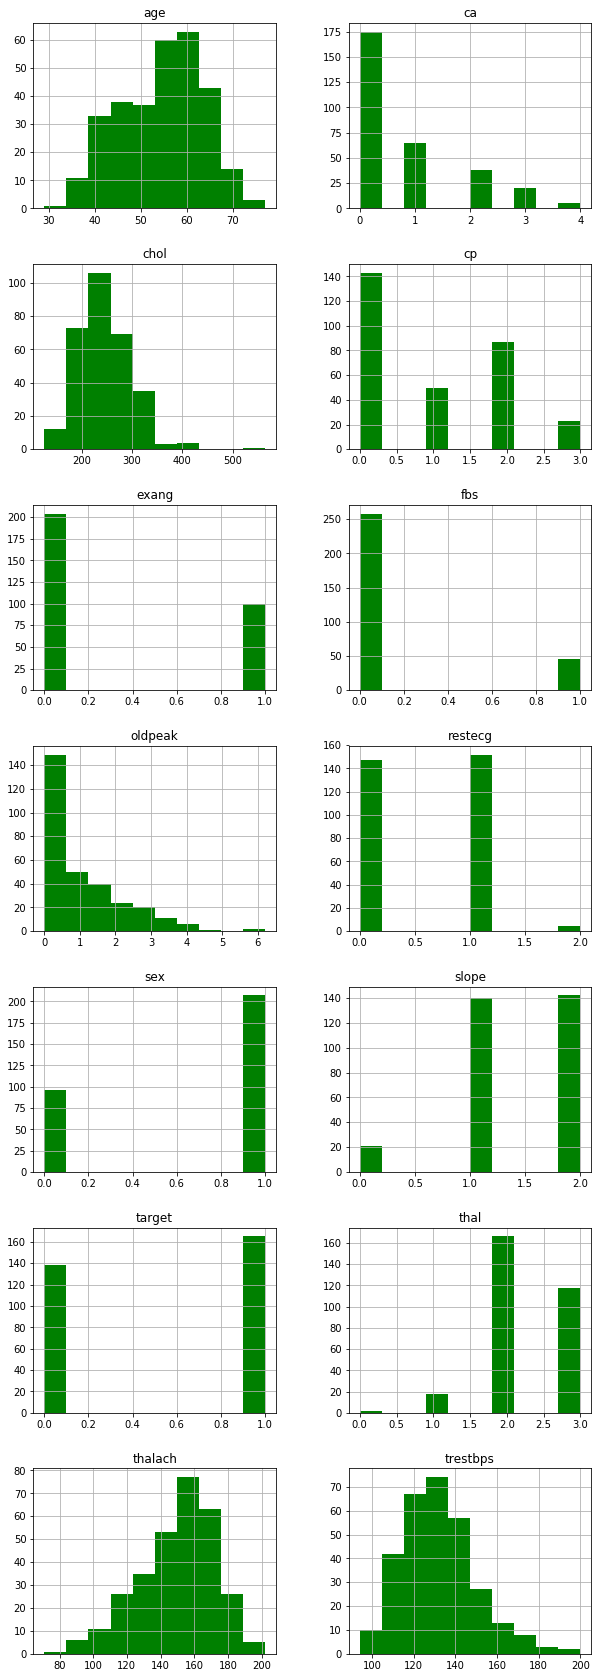

In [6]:
dataset.hist(layout = (7, 2),
            figsize = (10, 30),
            color=['green'])

Text(0, 0.5, 'Samples')

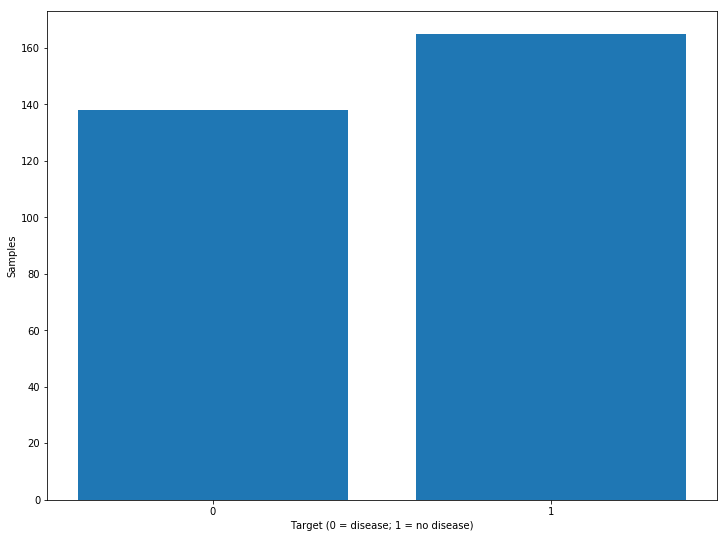

In [7]:
rcParams['figure.figsize'] = 12, 9
plt.bar(dataset['target'].unique(), dataset['target'].value_counts())
plt.xticks([0, 1])
plt.xlabel('Target (0 = disease; 1 = no disease)')
plt.ylabel('Samples')

<h2>Preprocessing</h2>

Assign dummy values to categories

In [8]:
dataset = pd.get_dummies(dataset, columns = ['ca',
                                             'cp', 
                                             'exang', 
                                             'fbs', 
                                             'restecg',
                                             'sex',
                                             'slope',
                                             'thal'])

Scale following columns:

1. age
2. chol
3. oldpeak
4. thalach
5. trestbps

In [9]:
change_scale = ['age', 'chol', 'oldpeak', 'thalach', 'trestbps']
dataset[change_scale] = StandardScaler().fit_transform(dataset[change_scale])

C:\Users\Raghav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raghav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Split into training and testing sets

In [10]:
Y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 42)

<h2>Machine Learning Algorithms</h2>



<h3>K-Nearest Neighbors</h3>

In [13]:
print("Training K-Nearest Neighbors")
knn = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, Y_train)
    knn.append(knn_classifier.score(X_test, Y_test))

Training K-Nearest Neighbors


Text(0.5, 1.0, 'K-Nearest Neighbors')

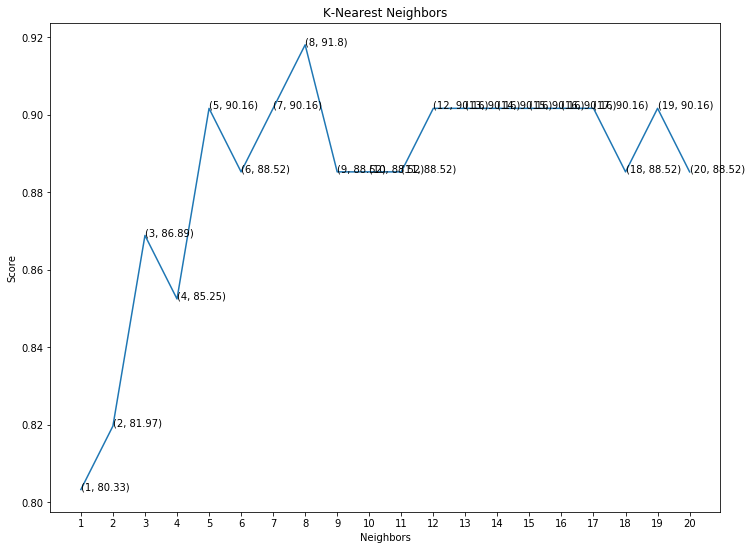

In [14]:
plt.plot([i for i in range(1, 21)], knn)
for i in range(1, 21):
    plt.text(i, knn[i - 1], (i, round(knn[i - 1]*100, 2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors')

K-Nearest Neighbors Accuracy: <b><i>91.8%</i></b> with 8 neighbors.

<h3>Support Vector Classifier</h3>

In [15]:
svc = []
activators = ['poly', 'sigmoid', 'linear', 'rbf']
for i in range(len(activators)):
    SVclassifier = SVC(kernel = activators[i])
    SVclassifier.fit(X_train, Y_train)
    svc.append(SVclassifier.score(X_test, Y_test))

NameError: name 'SVC' is not defined

Text(0.5, 1.0, 'Support Vector Classifier')

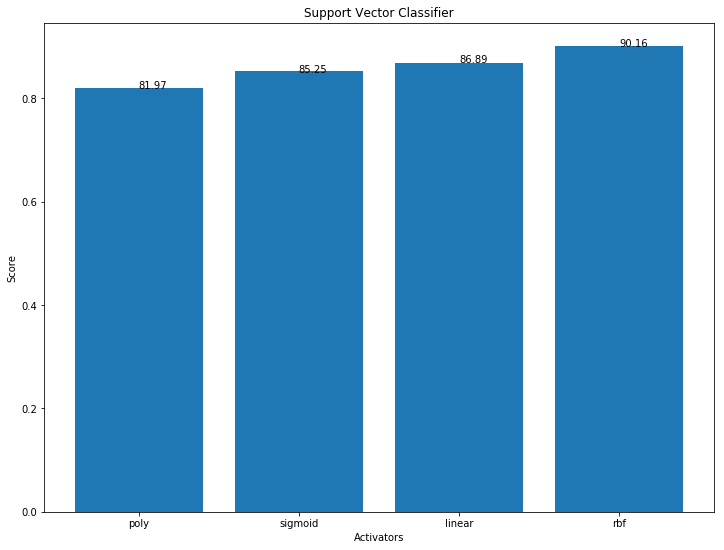

In [22]:
plt.bar(activators, svc)
for i in range(len(activators)):
    plt.text(i, round(svc[i],2), round(svc[i]*100,2))
plt.xlabel('Activators')
plt.ylabel('Score')
plt.title('Support Vector Classifier')

Support Vector Classifier accuracy: <b><i>90.16%</i></b> with rbf activation.

<h3>Decision Tree Classifier</h3>

In [61]:
dt = []
for i in range(1, len(X.columns) + 1):
    dtc = DecisionTreeClassifier(max_features = i)
    dtc.fit(X_train, Y_train)
    dt.append(dtc.score(X_test, Y_test))

Text(0, 0.5, 'Scores')

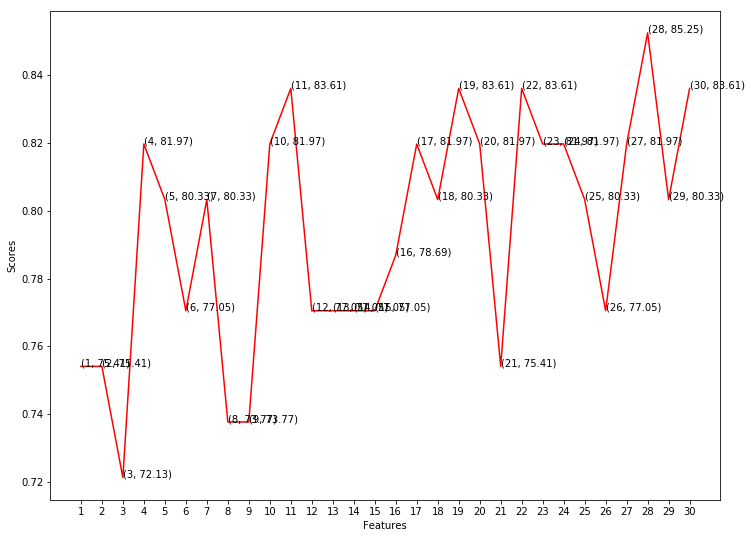

In [62]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt[i-1], (i, round(dt[i-1]*100, 2)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Features')
plt.ylabel('Scores')

Decision Tree Accuracy: <b><i>85.25%</i></b> with 28 maximum features

<h2>Conclusion</h2>

The maximum accuracy is 91.8%, achieved using K-Nearest Neighbors with 8 neighbors.